## Import modules

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

## Load data

In [5]:
forests = pd.read_csv('forests.csv')

## Final clean

In [6]:
forests = forests.dropna()

In [7]:
forests.temp = forests.temp.astype(int)

In [8]:
forests["fire"] = forests["fire"].apply(lambda x: x.replace("\\", ""))

## Check multicollinearity with a heatmap

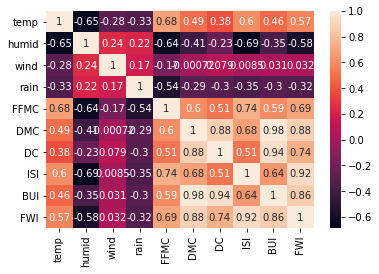

In [9]:
corr_grid = forests.corr()
sns.heatmap(corr_grid, xticklabels = corr_grid.columns, yticklabels = corr_grid.columns, annot = True)
plt.show()

## Plot humidity vs temperature

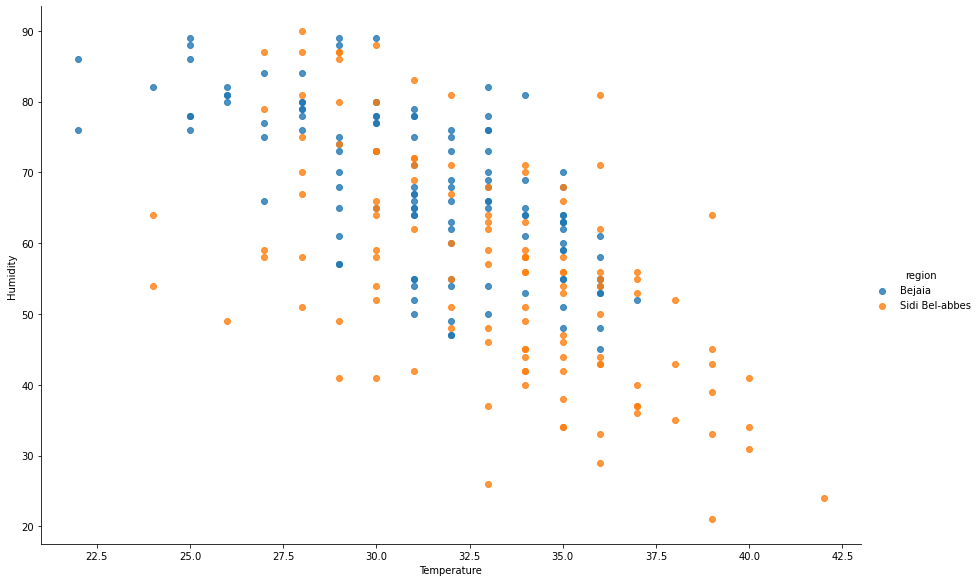

In [10]:
g = sns.lmplot(data = forests, x = "temp", y = "humid", hue = "region", fit_reg = False, height = 8, aspect = 1.5)
g.set_ylabels("Humidity")
g.set_xlabels("Temperature")

## Fit model predicting humidity

In [11]:
modelH = sm.OLS.from_formula("humid ~ temp + region", data = forests).fit()
modelH.params

Intercept                   142.575801
region[T.Sidi Bel-abbes]     -7.247538
temp                         -2.392547
dtype: float64

Regression equations for each region

Bejaia
humid = 142.6 - 2.39 * temp - 7.24 * region
humid = 142.6 - 2.39 * temp - 7.24 * 0
humid = 142.6 - 2.39 * temp

Sidi Bel-abbes
humid = 142.6 - 2.39 * temp - 7.24 * region
humid = 142.6 - 2.39 * temp - 7.24 * 1
humid = 142.6 - 7.24 - 2.39 * temp
humid = 135.4 - 2.39 * temp

These regions have the same negative gradient but different intercepts, suggesting that these regressions lines would parallel but with Bejaia having consistently higher humidity.